# Avec une seule variable 



In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [220]:
df = pd.read_csv("Dataframe_clean.csv")
conf_df = pd.DataFrame(df["conf"])
dc_df = pd.DataFrame(df["dc_tot"])

On va maintenant scaller les données pour les adapter à notre réseau.

In [221]:
scaler = MinMaxScaler(feature_range=(0, 1))
conf = scaler.fit_transform(conf_df)
dc = scaler.fit_transform(dc_df)

On va maintenant créer nos batchs d'entrainement et de test. On utilisera la même répartition que pour la régression sur de courtes durées. C'est à dire 2 semaines de données pour une semaine de prédiction

On recoupera ensuite cette série en deux sous séries d'entrainement et de test. 

In [222]:
train = []
test = []

for k in range(15,508-8) : 
  train.append(np.array(conf[k-14:k]))
  test.append(np.array(conf[k:k+7]))

train_training = np.array(train[:2* len(train)//3])
test_training = np.array(test[:2* len(test)//3])

train_testing = np.array(train[2* len(train)//3:])
test_testing = np.array(test[2* len(test)//3:])

# test_df = df[~df.index.isin(index_train)]
# fig, ax = plt.subplots()
# ax.scatter(train_df.index,train_df["conf"],marker='.',label="entrainement")
# ax.scatter(test_df.index,test_df["conf"],marker='.',color="purple",label="test")
# plt.legend()
# ax.set_title("Répartition d'entrainement/test")
# plt.show()

In [223]:
test_testing.shape, train_testing.shape

((162, 7, 1), (162, 14, 1))

In [224]:
model = Sequential()
model.add(LSTM(units = 1000,return_sequences=True,input_shape=(14,1)))
model.add(LSTM(units =1000))
model.add(Dense(units=7))

model.compile(loss="mean_squared_error", optimizer="adam", metrics=['categorical_accuracy'])



In [225]:
history = model.fit(train_training,test_training, epochs=100, batch_size=64)



Epoch 1/100
6/6 [==============================] - 14s 2s/step - loss: 0.0164 - categorical_accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 10s 2s/step - loss: 0.0056 - categorical_accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 10s 2s/step - loss: 0.0033 - categorical_accuracy: 0.1734
Epoch 4/100
6/6 [==============================] - 10s 2s/step - loss: 8.4238e-04 - categorical_accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 10s 2s/step - loss: 5.4188e-04 - categorical_accuracy: 0.1486
Epoch 6/100
6/6 [==============================] - 10s 2s/step - loss: 2.8267e-04 - categorical_accuracy: 0.0093
Epoch 7/100
6/6 [==============================] - 10s 2s/step - loss: 1.6866e-04 - categorical_accuracy: 0.1393
Epoch 8/100
6/6 [==============================] - 10s 2s/step - loss: 1.1986e-04 - categorical_accuracy: 0.2229
Epoch 9/100
6/6 [==============================] - 10s 2s/step - loss: 6.8436e-05 - categorical_

In [226]:
pred = model.predict(train_testing)

In [227]:
test_testing = test_testing.reshape(162,7)

RMSE: 0.15484732709778415


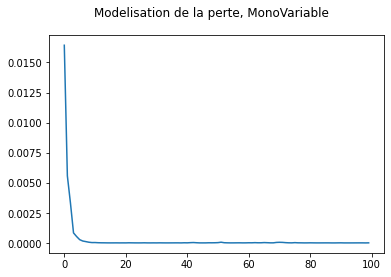

In [228]:
rmse = math.sqrt(mean_squared_error(test_testing, pred))
print(f'RMSE: {rmse}')

fig, ax = plt.subplots()
fig.suptitle("Modelisation de la perte, MonoVariable")
ax.plot(history.history["loss"])
plt.show()

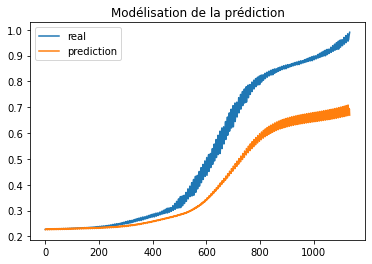

In [231]:
plt.title("Modélisation de la prédiction")
plt.plot(np.concatenate(test_testing),label="real")
plt.plot(np.concatenate(pred),label="prediction")
plt.legend()